<a href="https://colab.research.google.com/github/anitahf/Clase---Aprendizaje-Automatico/blob/main/05_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ana Hidalgo &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [ ]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [ ]:
url = "https://raw.githubusercontent.com/anitahf/Clase---Aprendizaje-Automatico/main/dataset.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
#Voy a tomar una muesra ya quie tengo varios filas y esto demorarar al ejercicio
df_sample = df.sample(frac=0.2, random_state=42)

In [ ]:
y = df_sample["track_genre"]

X = df_sample.drop(columns=[
    "track_genre", "track_id", "artists",
    "album_name", "track_name", "Unnamed: 0"
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[int(np.argmax(accuracies))]
best_acc = max(accuracies)

print("Mejor valor de k:", best_k)
print("Mejor precisión:", best_acc)

Mejor valor de k: 13
Mejor precisión: 0.18552631578947368


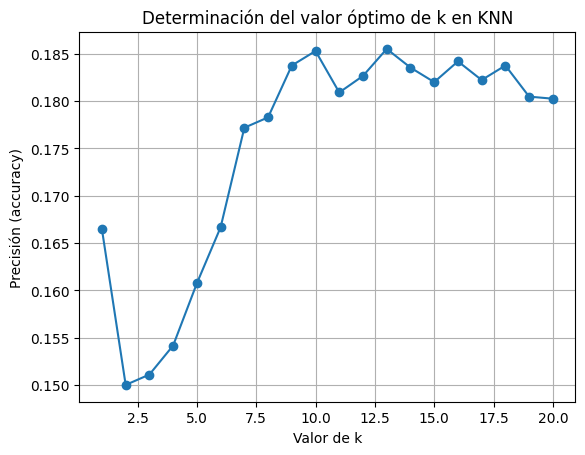

In [ ]:
plt.plot(list(k_values), accuracies, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Precisión (accuracy)")
plt.title("Determinación del valor óptimo de k en KNN")
plt.grid(True)
plt.show()

Para elegir el valor de k en el algoritmo KNN, se probaron distintos valores de k entre 1 y 20 y se calculó la precisión del modelo para cada uno. Con estos resultados se hizo una gráfica de k contra la precisión, lo que permitió ver cómo cambia el desempeño del modelo al variar el número de vecinos. En la gráfica se nota que la precisión aumenta conforme k va creciendo, hasta llegar a su punto más alto en k = 13. En ese valor se obtuvo una precisión aproximada de 18.55%, que fue la mayor entre todos los valores evaluados. Después de ese punto, la precisión ya no mejora de forma significativa, por lo que se decidió usar k = 13 como el valor óptimo.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [ ]:
k_optimo = 13
knn_final = KNeighborsClassifier(n_neighbors=k_optimo)
knn_final.fit(X_train_scaled, y_train)

# Predicción
y_pred = knn_final.predict(X_test_scaled)

# Métricas
acc = accuracy_score(y_test, y_pred)
print("k seleccionado:", k_optimo)
print("Accuracy:", acc)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)


k seleccionado: 13
Accuracy: 0.1212719298245614

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.20      0.72      0.32       662
           1       0.05      0.06      0.05       103
           2       0.10      0.11      0.10        46
           3       0.03      0.07      0.04        15
           4       0.14      0.07      0.10        14
           5       0.09      0.19      0.12        21
           6       0.00      0.00      0.00        14
           7       0.05      0.05      0.05        19
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        28
          11       0.11      0.05      0.07        38
          12       0.03      0.04      0.04        23
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        21
          15       0.07      0.04      0.05        28
      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


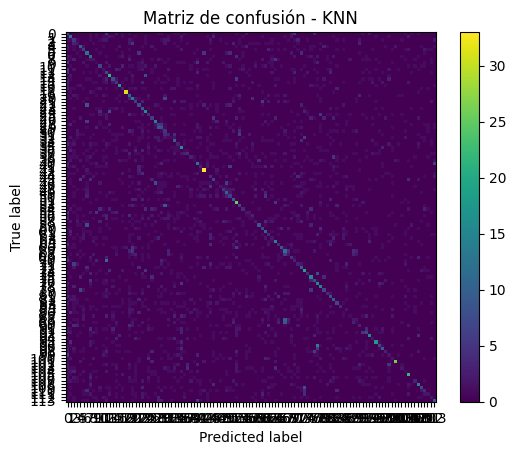

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(include_values=False)
plt.title("Matriz de confusión - KNN")
plt.show()

La matriz de confusión muestra cómo el modelo KNN clasifica los datos comparando las clases reales con las predichas. Dentro de esto se observa una línea diagonal más marcada, lo que indica que el modelo logra clasificar correctamente varias instancias. Sin embargo, también se aprecian errores fuera de la diagonal, lo que significa que el modelo confunde algunos géneros entre sí. Esto es normal debido a la gran cantidad de clases y a la similitud entre varios géneros musicales.

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
y = df["popularity"]

X = df.drop(columns=[
    "popularity", "track_genre", "track_id",
    "artists", "album_name", "track_name", "Unnamed: 0"
])

In [ ]:
df_reg = pd.concat([X, y], axis=1).sample(frac=0.2, random_state=42)

y = df_reg["popularity"]
X = df_reg.drop(columns=["popularity"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [ ]:
k_values = range(1, 21)
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_k = k_values[int(np.argmin(mse_values))]
best_mse = min(mse_values)

print("Mejor k:", best_k)
print("Mejor MSE:", best_mse)

Mejor k: 17
Mejor MSE: 470.2117244885571


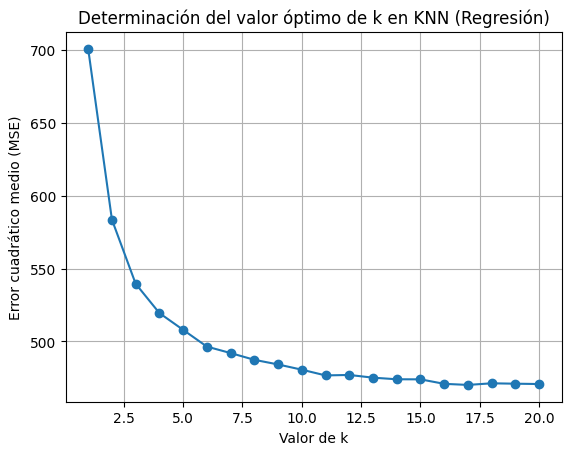

In [ ]:
plt.plot(list(k_values), mse_values, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Determinación del valor óptimo de k en KNN (Regresión)")
plt.grid(True)
plt.show()

Para la parte de regresión con KNN, se evaluaron distintos valores de k entre 1 y 20 con el objetivo de encontrar el que mejor desempeño tuviera al predecir la popularidad de las canciones. Para cada valor de k se calculó el error cuadrático medio (MSE), ya que esta métrica permite medir qué tan lejos están las predicciones de los valores reales. A partir de los resultados obtenidos, se generó una gráfica de k contra el MSE, donde se observa que el error disminuye a medida que aumenta el valor de k. El menor error se obtuvo con k = 17, con un MSE aproximado de 470.21, por lo que este valor fue seleccionado como el óptimo.

La gráfica muestra claramente qbue después de este punto el error se mantiene estable, lo que confirma que k = 17 ofrece el mejor equilibrio entre simplicidad y desempeño del modelo.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [ ]:
k_optimo = 17
knn_reg_final = KNeighborsRegressor(n_neighbors=k_optimo)
knn_reg_final.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn_reg_final.predict(X_test_scaled)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("k seleccionado:", k_optimo)
print("Error cuadrático medio:", mse)
print("Raíz del error cuadrático medio:", rmse)
print("R²:", r2)

k seleccionado: 17
Error cuadrático medio: 470.2117244885571
Raíz del error cuadrático medio: 21.68436590008011
R²: 0.0508596522035174


Con el valor óptimo de k = 17, se entrenó el modelo de regresión KNN y se evaluó con el conjunto de prueba. El error cuadrático medio (MSE) obtenido fue de aproximadamente 470.21, mientras que el RMSE fue cercano a 21.68, lo que indica el error promedio de las predicciones. Además, el valor de R² fue alrededor de 0.05, mostrando que el modelo explica una pequeña parte de la variabilidad de la popularidad.
